In [2]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()
import datetime

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

import seaborn as sns

from ipynb.fs.full.MyFunctions_00 import *

In [3]:
voids_parent = read_data_db('voids_parent_colors_' + 'new_' + '04-11-23') # timestamp())
walls_parent = read_data_db('walls_parent_colors_' + 'new_' + '04-11-23') # timestamp())

walls_parent.head()

read voids_parent_colors_new_04-11-23
read walls_parent_colors_new_04-11-23


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
0,464.0,21.0,0.765606,0,148.728855,0.188863,267,152,51608,-20.542107,...,0.057,19.2,10.944,0.128,8.5,8.427,0.377,2.9,0.301,3.538
1,570.0,23.0,0.980080,0,147.428682,1.107487,267,362,51608,-21.410318,...,0.028,39.3,11.477,0.211,5.1,8.779,NaN,0.4,0.142,1.660
2,572.0,21.0,0.788920,0,147.511343,1.100596,267,369,51608,-20.423737,...,0.042,25.9,11.941,NaN,0.8,9.017,NaN,-0.5,0.068,2.034
3,576.0,23.0,0.801471,0,147.561502,1.229841,267,378,51608,-21.105976,...,0.032,33.5,10.517,0.086,12.6,7.995,NaN,1.8,0.178,2.982
4,615.0,21.0,0.915904,0,148.015821,1.148428,267,442,51608,-19.731482,...,0.038,28.8,12.296,NaN,1.0,9.303,NaN,-0.8,0.018,1.611


In [4]:
print(len(voids_parent))
voids_parent_nona = voids_parent.dropna(subset = ['W2-W3'])
print(len(voids_parent_nona))

print('')

print(len(walls_parent))
walls_parent_nona = walls_parent.dropna(subset = ['W2-W3'])
print(len(walls_parent_nona))

71261
71259

219255
219253


### Create Color-color Diagram

In [5]:
# put new data into old variables:
voids_colors = voids_parent_nona
walls_colors = walls_parent_nona

mean_voids_12 = voids_colors['W1-W2'].mean()
std_voids_12 = np.std(voids_colors['W1-W2'])

mean_voids_23 = voids_colors['W2-W3'].mean()
std_voids_23 = np.std(voids_colors['W2-W3'])

mean_walls_12 = walls_colors['W1-W2'].mean()
std_walls_12 = np.std(walls_colors['W1-W2'])

mean_walls_23 = walls_colors['W2-W3'].mean()
std_walls_23 = np.std(walls_colors['W2-W3'])

In [6]:
voids_colors.head()

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
0,75.0,24.0,0.933297,1,145.874464,-0.608775,266,138,51630,-20.979137,...,0.057,19.1,10.802,0.124,8.7,8.286,0.435,2.5,0.110,3.232
1,95.0,24.0,0.948802,1,146.222266,-0.375920,266,168,51630,-20.544321,...,0.029,37.9,9.610,0.044,24.9,8.194,0.273,4.0,0.163,3.465
2,121.0,23.0,0.987329,1,145.681110,-0.867233,266,207,51630,-21.178394,...,0.027,39.9,11.039,0.139,7.8,8.913,NaN,-0.5,0.034,1.967
3,127.0,22.0,0.998411,1,145.759730,-0.813891,266,216,51630,-20.736423,...,0.058,18.7,10.507,0.120,9.1,7.438,NaN,1.4,0.127,2.721
4,128.0,22.0,0.900567,1,145.708927,-0.747680,266,217,51630,-19.849358,...,0.041,26.8,12.431,NaN,0.0,8.759,NaN,-0.6,0.166,1.533


In [7]:
walls_AGN = walls_colors[(walls_colors['W1-W2'] > 0.80)]
voids_AGN = voids_colors[(voids_colors['W1-W2'] > 0.80)]

In [8]:
walls_var = walls_colors[(walls_colors['Pr'] > 0.85)]
voids_var = voids_colors[(voids_colors['Pr'] > 0.85)]

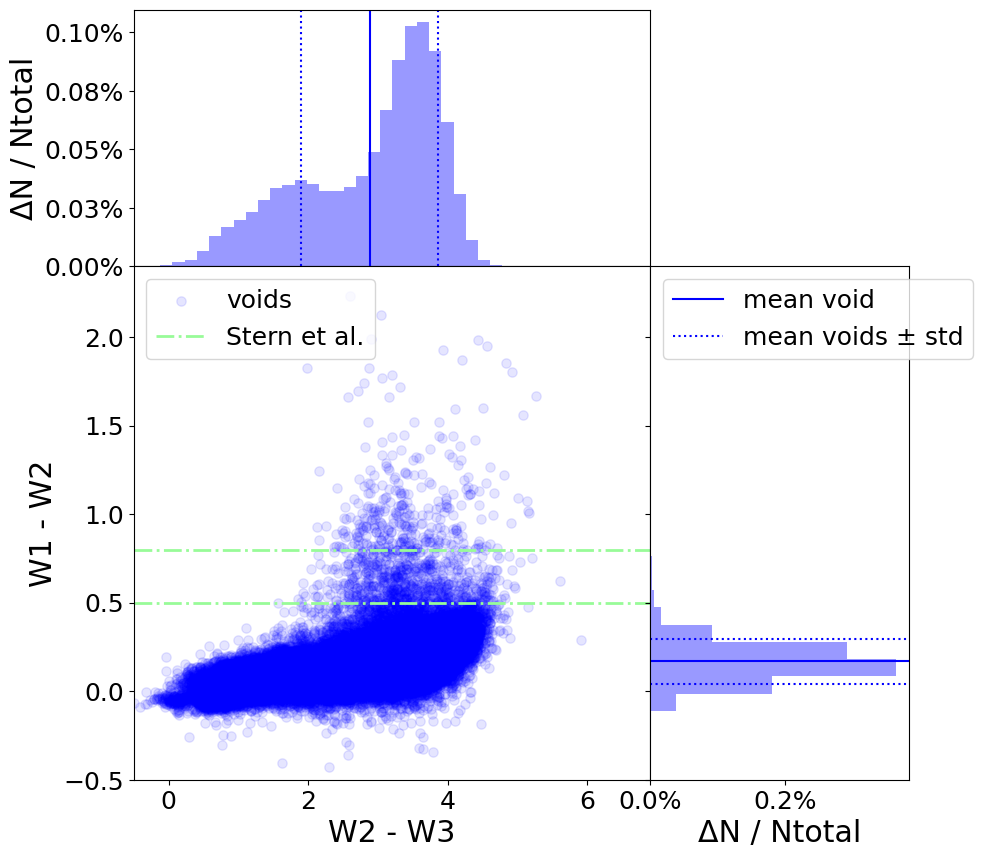

In [13]:
# PRESS 1

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1]} )

plt.subplots_adjust(wspace = 0, hspace = 0)

num_bins = 40

# fig.suptitle('New color–color diagram showing void and wall galaxies', fontsize = 'x-large')

# axs[0, 0].set_title('Color distribution', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(voids_colors['W2-W3'], 
                  voids_colors['W1-W2'], 
                  s = 45, 
                  c = 'blue',
                  marker = "o", 
                  label = 'voids',
                  alpha = 0.1)

# axs[1, 0].scatter(voids_AGN['W2-W3'], 
#                   voids_AGN['W1-W2'], 
#                   s = 45,
#                   facecolors='none',
#                   marker = "o", # change symbol
#                   label = 'mid-IR AGN',
#                   alpha = 1,
#                   linewidths = 1,
#                   edgecolors = 'palegreen')

# axs[1, 0].scatter(voids_var['W2-W3'], 
#                   voids_var['W1-W2'], 
#                   s = 45,
#                   facecolors='none',
#                   marker = "o", # change symbol
#                   label = 'variable',
#                   alpha = 1,
#                   linewidths = 1,
#                   edgecolors = 'orange')

# axs[1, 0].scatter(voids_colors['W2-W3'], 
#                   voids_colors['W1-W2'], 
#                   s = 45,
#                   c = 'blue',
#                   marker = "^", # change symbol
#                   label = 'void',
#                   alpha = 0.1)

axs[1, 0].set_ylim([-0.5, 2.4])
axs[1, 0].set_xlim([-0.5, 6.9])

# axs[0, 0].set_ylim([0, 0.225])
# axs[1, 1].set_xlim([0, 0.375])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
# axs[0, 0].hist(walls_colors['W2-W3'], 
#                color = "dimgray",
#                weights = np.ones_like(walls_colors['W2-W3']) / len(walls_colors['W2-W3']),
#                alpha = 0.3,
#                bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
#                                   max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
#                                   num = num_bins, 
#                                   endpoint = False))

axs[0, 0].hist(voids_colors['W2-W3'],
               color = "blue",
               linewidth = 1.2,
               weights = np.ones_like(voids_colors['W2-W3']) / len(voids_colors['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
# axs[0, 0].axvline(x = mean_walls_23, color = 'dimgrey')
# axs[0, 0].axvline(x = mean_walls_23 - std_walls_23, linestyle = 'dotted', color = 'dimgrey')
# axs[0, 0].axvline(x = mean_walls_23 + std_walls_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_23, color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 - std_voids_23, linestyle = 'dotted', color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 + std_voids_23, linestyle = 'dotted', color = 'blue')

# do the same for the bottom right subplot, except the histogram is horizontal
# axs[1, 1].hist(walls_colors['W1-W2'],
#                color = "dimgray", 
#                orientation='horizontal',
#                weights = np.ones_like(walls_colors['W1-W2']) / len(walls_colors['W1-W2']),
#                alpha = 0.3,
#                bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
#                                   max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
#                                   num = num_bins, 
#                                   endpoint = False)
#               )

axs[1, 1].hist(voids_colors['W1-W2'], 
               color = "blue", 
               weights = np.ones_like(voids_colors['W1-W2']) / len(voids_colors['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins,
                                  endpoint = False)
               )

# axs[1, 1].axhline(y = mean_walls_12, color = 'dimgrey', label = 'mean wall')
# axs[1, 1].axhline(y = mean_walls_12 - std_walls_12, linestyle = 'dotted', color = 'dimgrey', 
#                   label = 'mean wall ± std')
# axs[1, 1].axhline(y = mean_walls_12 + std_walls_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_12, color = 'blue', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_12 - std_voids_12, linestyle = 'dotted', color = 'blue', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_12 + std_voids_12, linestyle = 'dotted', color = 'blue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# # set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
# xp1 = np.linspace(1.958, 6.9, 100)
# xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
# xp3 = np.linspace(1.958, 2.25, 100)

# # calculate the y values for each line segment and plot
# yp1 = (0.315 * xp1) + 0.796
# yp2 = (0.315 * xp2) - 0.222
# yp3 = (-3.172 * xp3) + 7.624

# axs[1, 0].plot(xp1, yp1, color = "violet", linestyle = "dashed", linewidth = 2, label = "Mateos et al.")
# axs[1, 0].plot(xp2, yp2, color = "violet", linestyle = "dashed", linewidth = 2)
# axs[1, 0].plot(xp3, yp3, color = "violet", linestyle = "dashed", linewidth = 2)

axs[1, 0].legend(loc = 'upper left')
axs[1, 1].legend(loc = 'best')

plt.rcParams.update({'font.size': 18})

# sns.kdeplot(ax = axs[1, 0], data = voids_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'yellow')

# fig.savefig('Figures/AAS_new_color-color-filtered.png', dpi = 300)
plt.show()

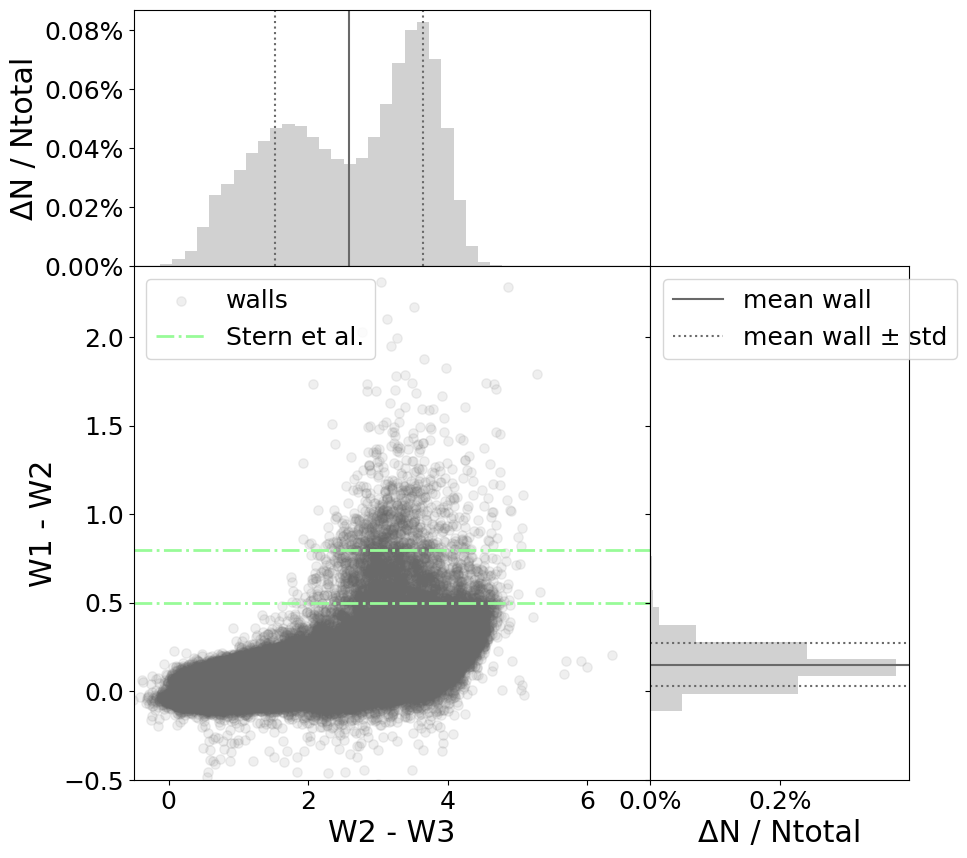

In [25]:
# PRESS 1

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1]} )

plt.subplots_adjust(wspace = 0, hspace = 0)

num_bins = 40

# fig.suptitle('New color–color diagram showing void and wall galaxies', fontsize = 'x-large')

# axs[0, 0].set_title('Color distribution', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_colors['W2-W3'], 
                  walls_colors['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = "o", 
                  label = 'walls',
                  alpha = 0.1)

# axs[1, 0].scatter(walls_AGN['W2-W3'], 
#                   walls_AGN['W1-W2'], 
#                   s = 45,
#                   facecolors='none',
#                   marker = "o", # change symbol
#                   label = 'mid-IR AGN',
#                   alpha = 1,
#                   linewidths = 1,
#                   edgecolors = 'palegreen')

# axs[1, 0].scatter(walls_var['W2-W3'], 
#                   walls_var['W1-W2'], 
#                   s = 45,
#                   facecolors='none',
#                   marker = "o", # change symbol
#                   label = 'variable',
#                   alpha = 1,
#                   linewidths = 1,
#                   edgecolors = 'orange')

# axs[1, 0].scatter(voids_colors['W2-W3'], 
#                   voids_colors['W1-W2'], 
#                   s = 45,
#                   c = 'blue',
#                   marker = "^", # change symbol
#                   label = 'void',
#                   alpha = 0.1)

axs[1, 0].set_ylim([-0.5, 2.4])
axs[1, 0].set_xlim([-0.5, 6.9])

# axs[0, 0].set_ylim([0, 0.225])
# axs[1, 1].set_xlim([0, 0.375])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_colors['W2-W3'], 
               color = "dimgray",
               weights = np.ones_like(walls_colors['W2-W3']) / len(walls_colors['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

# axs[0, 0].hist(voids_colors['W2-W3'],
#                color = "blue",
#                linewidth = 1.2,
#                weights = np.ones_like(voids_colors['W2-W3']) / len(voids_colors['W2-W3']),
#                alpha = 0.4,
#                bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
#                                   max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
#                                   num = num_bins, 
#                                   endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_23, color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 - std_walls_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 + std_walls_23, linestyle = 'dotted', color = 'dimgrey')

# axs[0, 0].axvline(x = mean_voids_23, color = 'blue')
# axs[0, 0].axvline(x = mean_voids_23 - std_voids_23, linestyle = 'dotted', color = 'blue')
# axs[0, 0].axvline(x = mean_voids_23 + std_voids_23, linestyle = 'dotted', color = 'blue')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_colors['W1-W2'],
               color = "dimgray", 
               orientation='horizontal',
               weights = np.ones_like(walls_colors['W1-W2']) / len(walls_colors['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins, 
                                  endpoint = False)
              )

# axs[1, 1].hist(voids_colors['W1-W2'], 
#                color = "blue", 
#                weights = np.ones_like(voids_colors['W1-W2']) / len(voids_colors['W1-W2']),
#                alpha = 0.4,
#                orientation='horizontal',
#                bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
#                                   max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
#                                   num = num_bins,
#                                   endpoint = False)
#                )

axs[1, 1].axhline(y = mean_walls_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_12 - std_walls_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_12 + std_walls_12, linestyle = 'dotted', color = 'dimgrey')

# axs[1, 1].axhline(y = mean_voids_12, color = 'blue', label = 'mean void')
# axs[1, 1].axhline(y = mean_voids_12 - std_voids_12, linestyle = 'dotted', color = 'blue', 
#                   label = 'mean voids ± std')
# axs[1, 1].axhline(y = mean_voids_12 + std_voids_12, linestyle = 'dotted', color = 'blue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# # set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
# xp1 = np.linspace(1.958, 6.9, 100)
# xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
# xp3 = np.linspace(1.958, 2.25, 100)

# # calculate the y values for each line segment and plot
# yp1 = (0.315 * xp1) + 0.796
# yp2 = (0.315 * xp2) - 0.222
# yp3 = (-3.172 * xp3) + 7.624

# axs[1, 0].plot(xp1, yp1, color = "violet", linestyle = "dashed", linewidth = 2, label = "Mateos et al.")
# axs[1, 0].plot(xp2, yp2, color = "violet", linestyle = "dashed", linewidth = 2)
# axs[1, 0].plot(xp3, yp3, color = "violet", linestyle = "dashed", linewidth = 2)

axs[1, 0].legend(loc = 'best')
axs[1, 1].legend(loc = 'best')

plt.rcParams.update({'font.size': 18})

# sns.kdeplot(ax = axs[1, 0], data = voids_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'yellow')

# fig.savefig('Figures/AAS_new_color-color-filtered.png', dpi = 300)
plt.show()

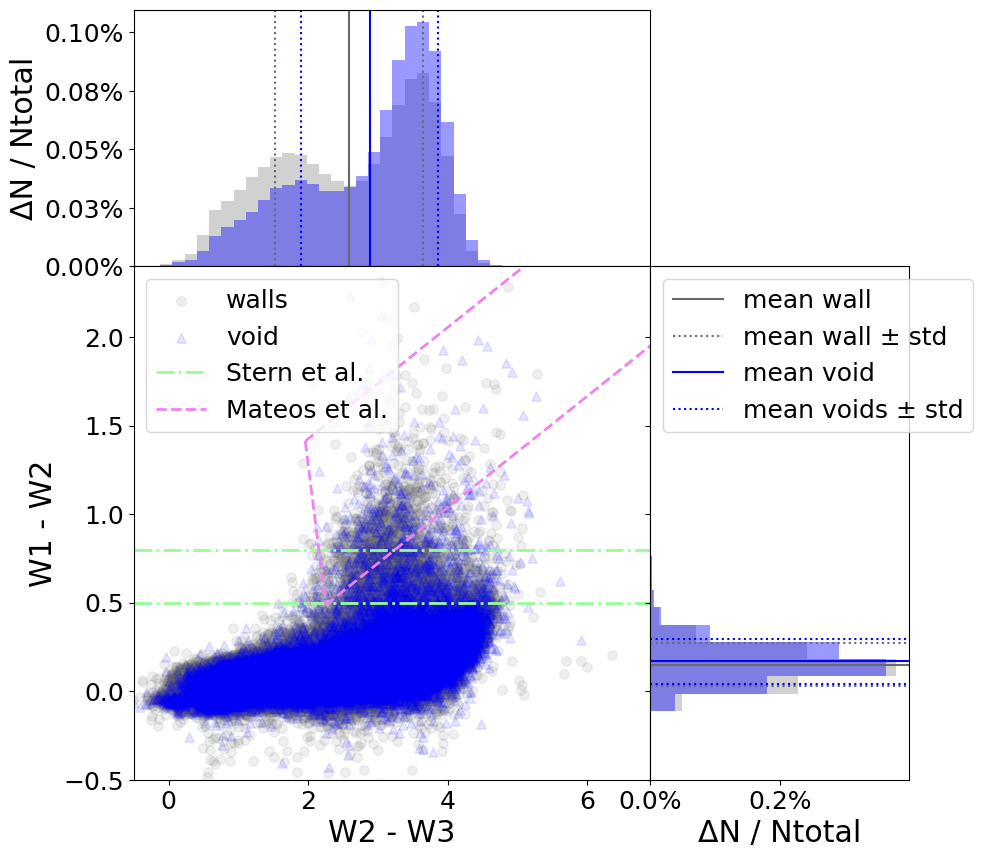

In [14]:
# plot color-color diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1]} )

plt.subplots_adjust(wspace = 0, hspace = 0)

num_bins = 40

# fig.suptitle('New color–color diagram showing void and wall galaxies', fontsize = 'x-large')

# axs[0, 0].set_title('Color distribution', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_colors['W2-W3'], 
                  walls_colors['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = "o", 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 0].scatter(voids_colors['W2-W3'], 
                  voids_colors['W1-W2'], 
                  s = 45,
                  c = 'blue',
                  marker = "^", # change symbol
                  label = 'void',
                  alpha = 0.1)

axs[1, 0].set_ylim([-0.5, 2.4])
axs[1, 0].set_xlim([-0.5, 6.9])

# axs[0, 0].set_ylim([0, 0.225])
# axs[1, 1].set_xlim([0, 0.375])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_colors['W2-W3'], 
               color = "dimgray",
               weights = np.ones_like(walls_colors['W2-W3']) / len(walls_colors['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 0].hist(voids_colors['W2-W3'],
               color = "blue",
               linewidth = 1.2,
               weights = np.ones_like(voids_colors['W2-W3']) / len(voids_colors['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_23, color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 - std_walls_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 + std_walls_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_23, color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 - std_voids_23, linestyle = 'dotted', color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 + std_voids_23, linestyle = 'dotted', color = 'blue')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_colors['W1-W2'],
               color = "dimgray", 
               orientation='horizontal',
               weights = np.ones_like(walls_colors['W1-W2']) / len(walls_colors['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_colors['W1-W2'], 
               color = "blue", 
               weights = np.ones_like(voids_colors['W1-W2']) / len(voids_colors['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins,
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_12 - std_walls_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_12 + std_walls_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_12, color = 'blue', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_12 - std_voids_12, linestyle = 'dotted', color = 'blue', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_12 + std_voids_12, linestyle = 'dotted', color = 'blue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

axs[1, 0].plot(xp1, yp1, color = "violet", linestyle = "dashed", linewidth = 2, label = "Mateos et al.")
axs[1, 0].plot(xp2, yp2, color = "violet", linestyle = "dashed", linewidth = 2)
axs[1, 0].plot(xp3, yp3, color = "violet", linestyle = "dashed", linewidth = 2)

axs[1, 0].legend(loc = 'best')
axs[1, 1].legend(loc = 'best')

plt.rcParams.update({'font.size': 18})

# sns.kdeplot(ax = axs[1, 0], data = voids_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'yellow')

fig.savefig('Figures/AAS_new_color-color-filtered.png', dpi = 300)
plt.show()

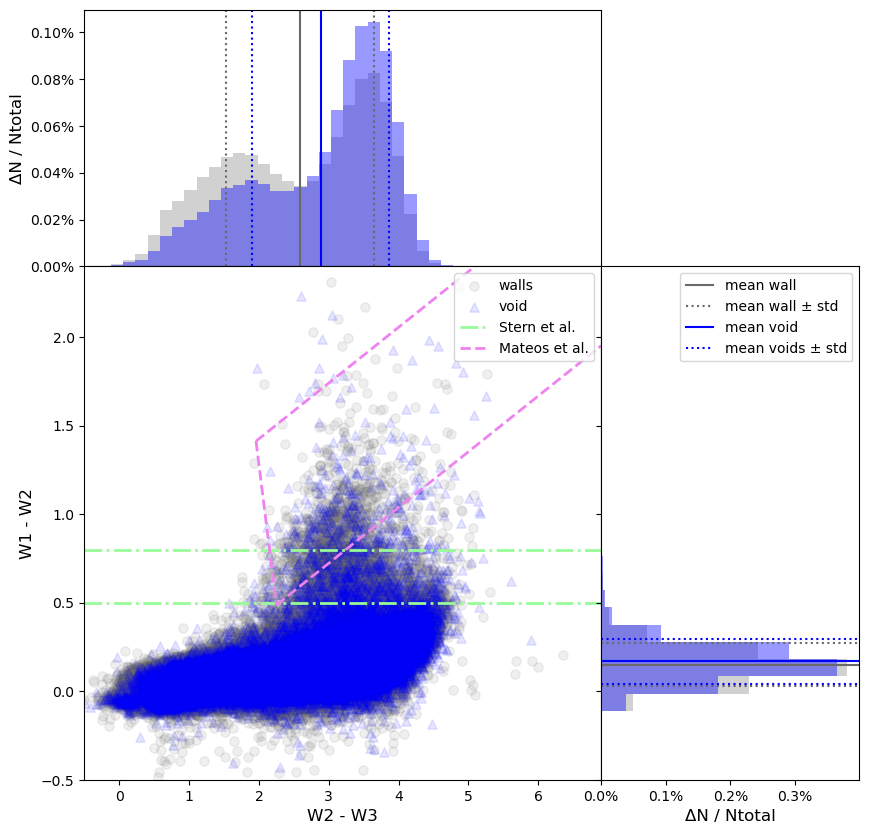

In [6]:
# plot color-color diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1]} )

plt.subplots_adjust(wspace = 0, hspace = 0)

num_bins = 40

# fig.suptitle('New color–color diagram showing void and wall galaxies', fontsize = 'x-large')

# axs[0, 0].set_title('Color distribution', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(walls_colors['W2-W3'], 
                  walls_colors['W1-W2'], 
                  s = 45, 
                  c = 'dimgray',
                  marker = "o", 
                  label = 'walls',
                  alpha = 0.1)

axs[1, 0].scatter(voids_colors['W2-W3'], 
                  voids_colors['W1-W2'], 
                  s = 45,
                  c = 'blue',
                  marker = "^", # change symbol
                  label = 'void',
                  alpha = 0.1)

axs[1, 0].set_ylim([-0.5, 2.4])
axs[1, 0].set_xlim([-0.5, 6.9])

# axs[0, 0].set_ylim([0, 0.225])
# axs[1, 1].set_xlim([0, 0.375])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_colors['W2-W3'], 
               color = "dimgray",
               weights = np.ones_like(walls_colors['W2-W3']) / len(walls_colors['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 0].hist(voids_colors['W2-W3'],
               color = "blue",
               linewidth = 1.2,
               weights = np.ones_like(voids_colors['W2-W3']) / len(voids_colors['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_23, color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 - std_walls_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 + std_walls_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_23, color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 - std_voids_23, linestyle = 'dotted', color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 + std_voids_23, linestyle = 'dotted', color = 'blue')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_colors['W1-W2'],
               color = "dimgray", 
               orientation='horizontal',
               weights = np.ones_like(walls_colors['W1-W2']) / len(walls_colors['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_colors['W1-W2'], 
               color = "blue", 
               weights = np.ones_like(voids_colors['W1-W2']) / len(voids_colors['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins,
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_12 - std_walls_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_12 + std_walls_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_12, color = 'blue', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_12 - std_voids_12, linestyle = 'dotted', color = 'blue', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_12 + std_voids_12, linestyle = 'dotted', color = 'blue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

axs[1, 0].plot(xp1, yp1, color = "violet", linestyle = "dashed", linewidth = 2, label = "Mateos et al.")
axs[1, 0].plot(xp2, yp2, color = "violet", linestyle = "dashed", linewidth = 2)
axs[1, 0].plot(xp3, yp3, color = "violet", linestyle = "dashed", linewidth = 2)

axs[1, 0].legend(loc = 'upper right')
axs[1, 1].legend(loc = 'upper right')

# sns.kdeplot(ax = axs[1, 0], data = voids_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'yellow')

# fig.savefig('Figures/new_color-color-filtered.png', dpi = 300)
plt.show()

### Create Percentage Table

In [7]:
# find the fraction of galaxies in both groups that have colors above the Stern et al. lines
voids_p80 = len(voids_colors[(voids_colors['W1-W2'] > 0.8)]) / len(voids_colors)
voids_p50 = len(voids_colors[(voids_colors['W1-W2'] > 0.5)]) / len(voids_colors)

# find the associated eror
err_voids_p80 = get_err(len(voids_colors[(voids_colors['W1-W2'] > 0.8)]), len(voids_colors))
err_voids_p50 = get_err(len(voids_colors[(voids_colors['W1-W2'] > 0.5)]), len(voids_colors))

walls_p80 = len(walls_colors[(walls_colors['W1-W2'] > 0.8)]) / len(walls_colors)
walls_p50 = len(walls_colors[(walls_colors['W1-W2'] > 0.5)]) / len(walls_colors)

err_walls_p80 = get_err(len(walls_colors[(walls_colors['W1-W2'] > 0.8)]), len(walls_colors))
err_walls_p50 = get_err(len(walls_colors[(walls_colors['W1-W2'] > 0.5)]), len(walls_colors))

# count number of points within wedge by Mateos et al. by using linear inequalities

count_voids = 0
count_walls = 0

x = 'W2-W3'
y = 'W1-W2'

voids_row_list = list(range(len(voids_colors)))
walls_row_list = list(range(len(walls_colors)))

# points must have values that are within all three lines making up the wedge
for i in voids_row_list:
    if((voids_colors.iloc[i][y] > (0.315 * voids_colors.iloc[i][x]) - 0.222) and
       (voids_colors.iloc[i][y] < (0.315 * voids_colors.iloc[i][x]) + 0.796) and
       (voids_colors.iloc[i][y] > (-3.172 * voids_colors.iloc[i][x]) + 7.624)):
        
        count_voids += 1
        
for i in walls_row_list:
    if((walls_colors.iloc[i][y] > (0.315 * walls_colors.iloc[i][x]) - 0.222) and
       (walls_colors.iloc[i][y] < (0.315 * walls_colors.iloc[i][x]) + 0.796) and
       (walls_colors.iloc[i][y] > (-3.172 * walls_colors.iloc[i][x]) + 7.624)):
        
        count_walls += 1

voids_percent_wedge = count_voids / len(voids_colors)
walls_percent_wedge = count_walls / len(walls_colors)

err_voids_wedge = get_err(count_voids, len(voids_colors))
err_walls_wedge = get_err(count_walls, len(walls_colors))

In [8]:
# assemble a table to summarize the fraction of galaxies in each of three metrics
# to see whether voids and walls vary in AGN abundance
percent_table = pd.DataFrame([['Voids', 
                               str(round(voids_p50, 3)) + err_voids_p50, 
                               str(round(voids_p80, 3)) + err_voids_p80,
                               str(round(voids_percent_wedge, 3)) + err_voids_wedge],
                              
                              ['Walls', 
                               str(round(walls_p50, 3)) + err_walls_p50, 
                               str(round(walls_p80, 3)) + err_walls_p80,
                               str(round(walls_percent_wedge, 3)) + err_walls_wedge]],
                             
                             columns = ['New galaxy', 
                                        'Fraction with W1 - W2 ≥ 0.5', 
                                        'Fraction with W1 - W2 ≥ 0.8', 
                                        'Fraction within Mateos et al. wedge'])

percent_table

,New galaxy,Fraction with W1 - W2 ≥ 0.5,Fraction with W1 - W2 ≥ 0.8,Fraction within Mateos et al. wedge
0,Voids,0.014 ± 0.032,0.005 ± 0.056,0.004 ± 0.057
1,Walls,0.012 ± 0.02,0.004 ± 0.035,0.004 ± 0.033


In [9]:
walls_colors_r85 = drop_r85(walls_colors)
voids_colors_r85 = drop_r85(voids_colors)

walls_colors_not85 = keep_r85(walls_colors)
voids_colors_not85 = keep_r85(voids_colors)

219253
17705

71259
5670

219253
201548

71259
65589



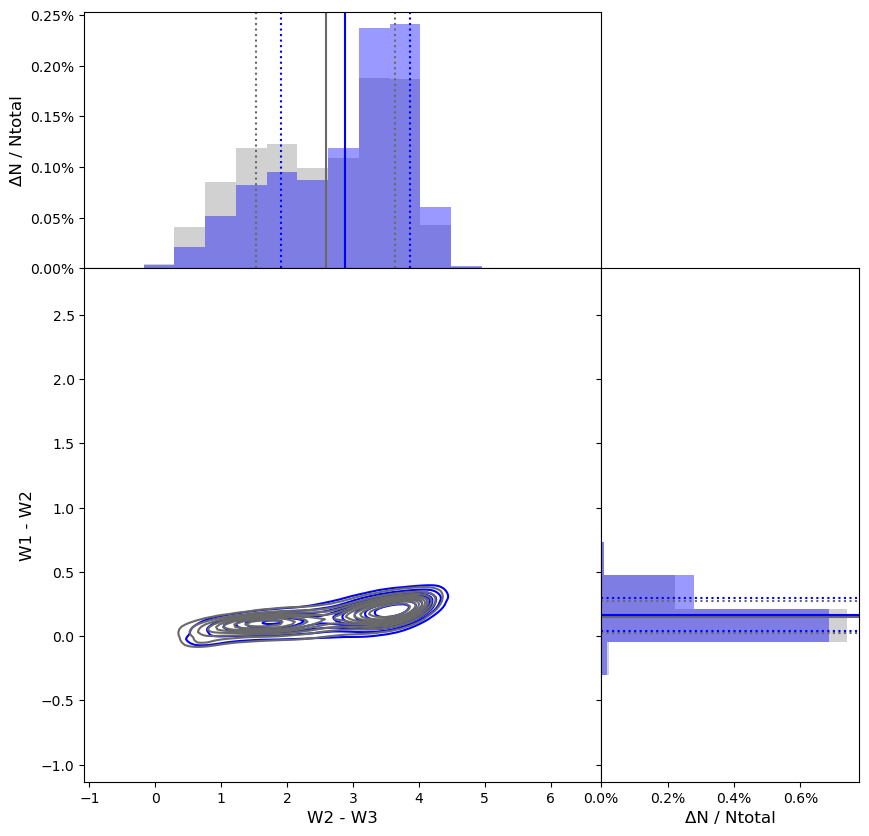

In [10]:
# plot color-color diagram! with countours!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1]} )

plt.subplots_adjust(wspace = 0, hspace = 0)

num_bins = 15

# fig.suptitle('New color–color diagram showing void and wall galaxies', fontsize = 'x-large')

# axs[0, 0].set_title('Color distribution', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points

# axs[1, 0].scatter(walls_colors['W2-W3'], 
#                   walls_colors['W1-W2'], 
#                   s = 45, 
#                   c = 'dimgray',
#                   marker = "o", 
#                   label = 'walls',
#                   alpha = 0.1)

# axs[1, 0].scatter(voids_colors['W2-W3'], 
#                   voids_colors['W1-W2'], 
#                   s = 45,
#                   c = 'blue',
#                   marker = "^", # change symbol
#                   label = 'void',
#                   alpha = 0.1)

# axs[1, 0].set_ylim([-0.5, 2.4])
# axs[1, 0].set_xlim([-0.5, 6.9])

# axs[0, 0].set_ylim([0, 0.225])
# axs[1, 1].set_xlim([0, 0.375])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_colors['W2-W3'], 
               color = "dimgray",
               weights = np.ones_like(walls_colors['W2-W3']) / len(walls_colors['W2-W3']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 0].hist(voids_colors['W2-W3'],
               color = "blue",
               linewidth = 1.2,
               weights = np.ones_like(voids_colors['W2-W3']) / len(voids_colors['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(min(walls_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(walls_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

# plot lines for the mean ± the standard deviation of the mean for both galaxy groups for each color
axs[0, 0].axvline(x = mean_walls_23, color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 - std_walls_23, linestyle = 'dotted', color = 'dimgrey')
axs[0, 0].axvline(x = mean_walls_23 + std_walls_23, linestyle = 'dotted', color = 'dimgrey')

axs[0, 0].axvline(x = mean_voids_23, color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 - std_voids_23, linestyle = 'dotted', color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 + std_voids_23, linestyle = 'dotted', color = 'blue')

# do the same for the bottom right subplot, except the histogram is horizontal
axs[1, 1].hist(walls_colors['W1-W2'],
               color = "dimgray", 
               orientation='horizontal',
               weights = np.ones_like(walls_colors['W1-W2']) / len(walls_colors['W1-W2']),
               alpha = 0.3,
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins, 
                                  endpoint = False)
              )

axs[1, 1].hist(voids_colors['W1-W2'], 
               color = "blue", 
               weights = np.ones_like(voids_colors['W1-W2']) / len(voids_colors['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(min(walls_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(walls_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins,
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_walls_12, color = 'dimgrey', label = 'mean wall')
axs[1, 1].axhline(y = mean_walls_12 - std_walls_12, linestyle = 'dotted', color = 'dimgrey', 
                  label = 'mean wall ± std')
axs[1, 1].axhline(y = mean_walls_12 + std_walls_12, linestyle = 'dotted', color = 'dimgrey')

axs[1, 1].axhline(y = mean_voids_12, color = 'blue', label = 'mean void')
axs[1, 1].axhline(y = mean_voids_12 - std_voids_12, linestyle = 'dotted', color = 'blue', 
                  label = 'mean voids ± std')
axs[1, 1].axhline(y = mean_voids_12 + std_voids_12, linestyle = 'dotted', color = 'blue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
# axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
# axs[1, 0].axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

# axs[1, 0].plot(xp1, yp1, color = "violet", linestyle = "dashed", linewidth = 2, label = "Mateos et al.")
# axs[1, 0].plot(xp2, yp2, color = "violet", linestyle = "dashed", linewidth = 2)
# axs[1, 0].plot(xp3, yp3, color = "violet", linestyle = "dashed", linewidth = 2)

# axs[1, 0].legend(loc = 'upper right')
# axs[1, 1].legend(loc = 'upper right')

sns.kdeplot(ax = axs[1, 0], data = voids_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'blue')
sns.kdeplot(ax = axs[1, 0], data = walls_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'dimgray')

# fig.savefig('Figures/new_color-color-filtered-countours.png', dpi = 300)
plt.show()

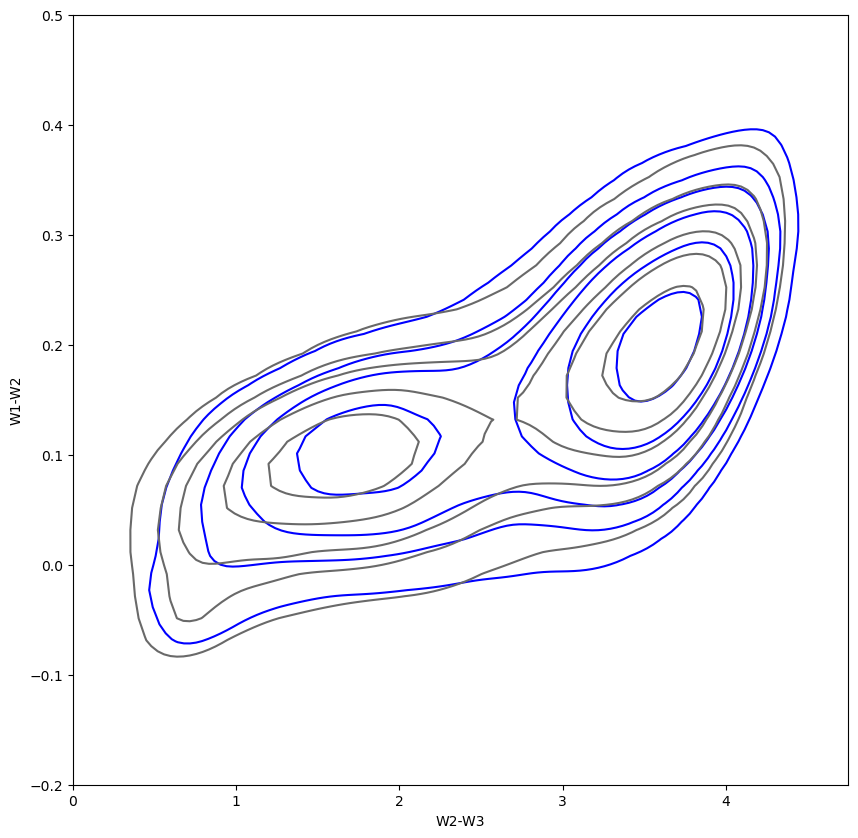

In [13]:
# plot color-color diagram! with countours!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(1, 1, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10))

levels_plot = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]

sns.kdeplot(ax = axs, data = voids_colors, x = 'W2-W3', y = 'W1-W2', levels = levels_plot, color = 'blue')
sns.kdeplot(ax = axs, data = walls_colors, x = 'W2-W3', y = 'W1-W2', levels = levels_plot, color = 'dimgray')

axs.set_ylim([-0.2, 0.5])
axs.set_xlim([0, 4.75])

# fig.savefig('Figures/new_color-color-filtered-countours.png', dpi = 300)
plt.show()